In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
#ETL
df = pd.read_csv('data/Allyears-market-region-hab-data.csv')

df.columns = df.columns.str.strip()

filtered_df = df[df['Geography'] == 'Total U.S.']

filtered_df

,Geography,Period,2020Units,2021Units,2022Units,2023Units,2020Dollars,2021Dollars,2022Dollars,2023Dollars,2020ASP,2021ASP,2022ASP,2023ASP
0,Total U.S.,1,193716227.0,204264892.7,162585783.0,169761056.5,186384248.3,190571271.8,204974123.0,176028113.3,0.962151,0.932961,1.260714,1.036917
59,Total U.S.,2,167478433.7,209960919.7,171581445.7,177325916.2,178709336.9,189459258.1,221506804.5,179134236.0,1.067059,0.902355,1.290972,1.010198
118,Total U.S.,3,176882274.9,194525882.7,149325877.3,174021676.0,216132586.1,196754282.5,210335915.7,173999277.8,1.221901,1.011456,1.408570,0.999871
177,Total U.S.,4,184998785.2,181530343.5,152694485.1,173137933.1,227587639.3,212087765.0,220713727.9,179758886.2,1.230212,1.168332,1.445460,1.038241
236,Total U.S.,5,213395671.2,193165563.4,154431703.1,180601049.7,247560362.2,215769774.7,231567334.9,187990158.6,1.160100,1.117020,1.499481,1.040914
295,Total U.S.,6,206834060.5,184140053.7,146974774.7,169155884.9,234511516.5,212467140.7,226077848.7,182279120.0,1.133815,1.153834,1.538209,1.077581
354,Total U.S.,7,198499962.8,184697630.8,144988303.3,158123965.8,218277644.6,202547377.8,214489658.5,185258957.9,1.099636,1.096643,1.479358,1.171606
413,Total U.S.,8,190574137.3,173144965.8,149137933.3,148021387.4,200528848.2,190824355.4,200651577.8,185167852.9,1.052235,1.102107,1.345409,1.250953
472,Total U.S.,9,187953345.7,167475049.3,150891143.6,155988480.4,190417207.4,188775413.0,186740672.6,180376169.3,1.013109,1.127185,1.237585,1.156343
531,Total U.S.,10,176891861.3,157607449.0,144322087.2,148110964.8,178478566.4,187241899.7,169350228.4,167046376.0,1.008970,1.188027,1.173419,1.127846


In [56]:
df = filtered_df

unit_columns = [col for col in df.columns if 'Units' in col]
dollar_columns = [col for col in df.columns if 'Dollars' in col]
asp_columns = [col for col in df.columns if 'ASP' in col]

units_df = pd.melt(df, id_vars=['Geography', 'Period'], value_vars=unit_columns,
                     var_name='Year', value_name='Units')
dollars_df = pd.melt(df, id_vars=['Geography', 'Period'], value_vars=dollar_columns,
                     var_name='Year', value_name='Dollars')
asp_df = pd.melt(df, id_vars=['Geography', 'Period'], value_vars=asp_columns,
                 var_name='Year', value_name='ASP')

units_df['Year'] = units_df['Year'].str.extract('(\d+)', expand=False)
dollars_df['Year'] = dollars_df['Year'].str.extract('(\d+)', expand=False)
asp_df['Year'] = asp_df['Year'].str.extract('(\d+)', expand=False)

merged_df = pd.merge(pd.merge(units_df, dollars_df, on=['Geography', 'Period', 'Year']),
                     asp_df, on=['Geography', 'Period', 'Year'])

merged_df = merged_df.sort_values(by=['Year', 'Period'])
merged_df.to_csv('data/merged_data.csv', index=False)

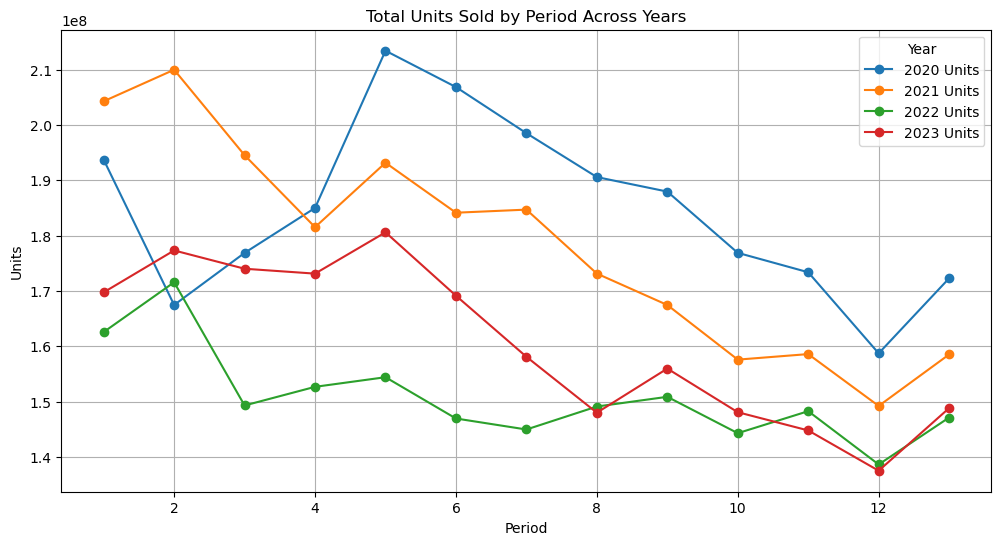

In [60]:
merged_df = pd.read_csv('data/merged_data.csv')
merged_df.columns = merged_df.columns.str.strip()

# Plot
plt.figure(figsize=(12, 6))

for year in merged_df['Year'].unique():
    subset = merged_df[merged_df['Year'] == year]
    plt.plot(subset['Period'], subset['Units'], marker='o', label=f'{year} Units')

plt.title('Total Units Sold by Period Across Years')
plt.xlabel('Period')
plt.ylabel('Units')
plt.legend(title='Year')
plt.grid(True)
plt.show()

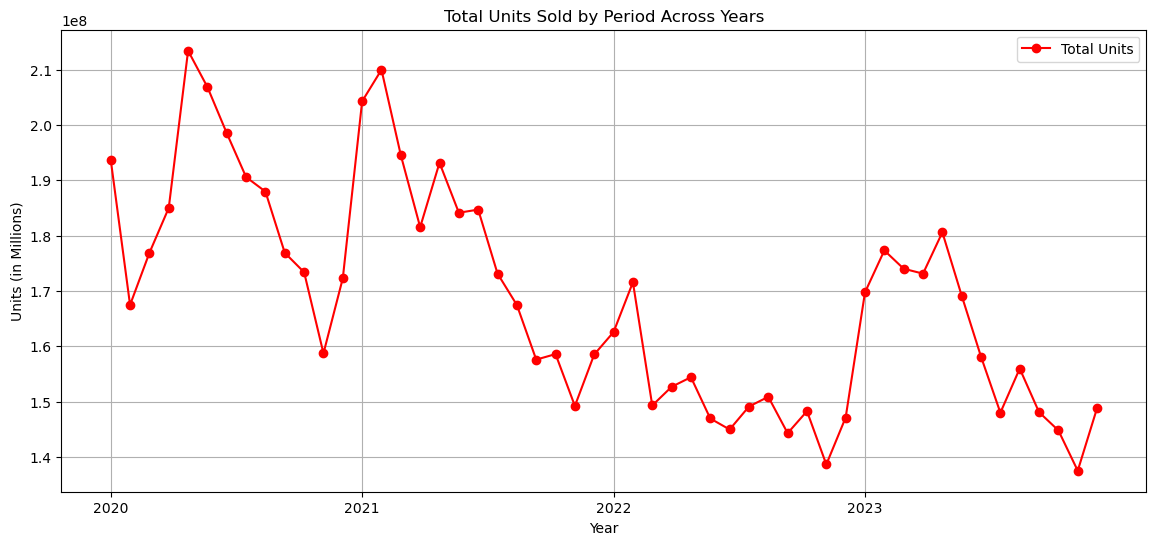

In [71]:
merged_df['Extended Period'] = (merged_df['Year'] - merged_df['Year'].min()) * 13 + merged_df['Period']

# Plotting
plt.figure(figsize=(14, 6))

# Plot line for units
plt.plot(merged_df['Extended Period'], merged_df['Units'], marker='o', linestyle='-', color='red', label='Total Units')

# Setting x-axis ticks to show each year at the start of its first period
ticks = merged_df.groupby('Year')['Extended Period'].min().tolist()
labels = merged_df['Year'].unique()

plt.xticks(ticks, labels)  

plt.title('Total Units Sold by Period Across Years')
plt.xlabel('Year')
plt.ylabel('Units (in Millions)')
plt.grid(True)
plt.legend()
plt.show()

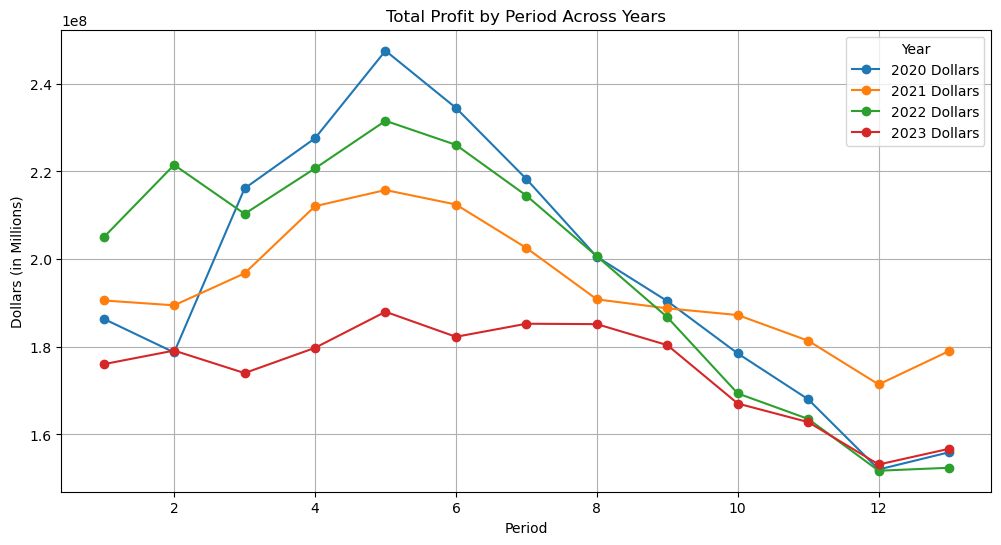

In [62]:
merged_df.columns = merged_df.columns.str.strip()

# Plot
plt.figure(figsize=(12, 6))

for year in merged_df['Year'].unique():
    subset = merged_df[merged_df['Year'] == year]
    plt.plot(subset['Period'], subset['Dollars'], marker='o', label=f'{year} Dollars')

plt.title('Total Profit by Period Across Years')
plt.xlabel('Period')
plt.ylabel('Dollars (in Millions)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

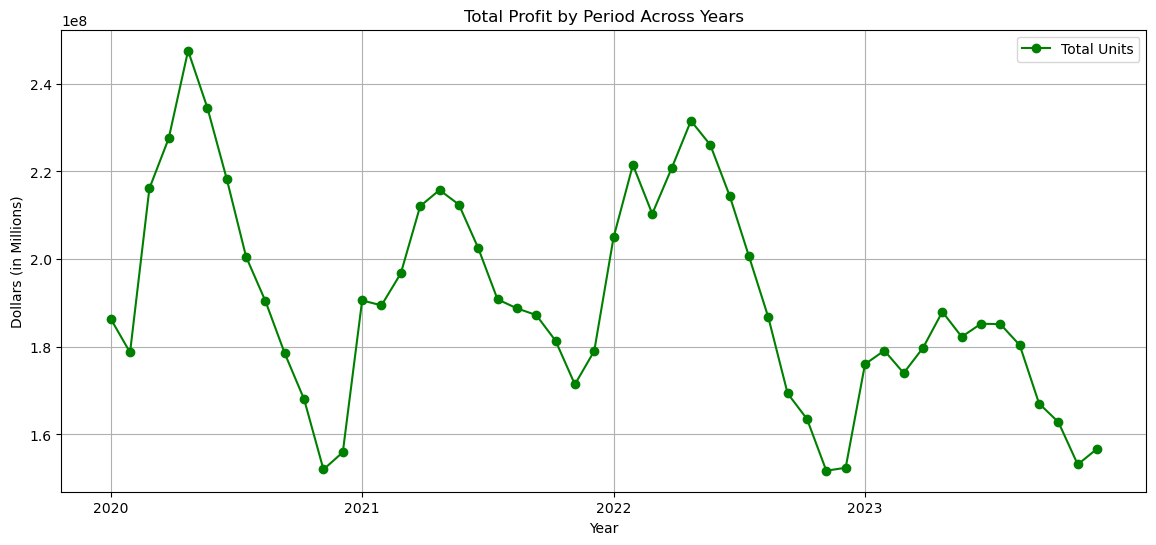

In [69]:
merged_df['Extended Period'] = (merged_df['Year'] - merged_df['Year'].min()) * 13 + merged_df['Period']

# Plotting
plt.figure(figsize=(14, 6))

# Plot line for dollars
plt.plot(merged_df['Extended Period'], merged_df['Dollars'], marker='o', linestyle='-', color='green', label='Total Units')

# Setting x-axis ticks to show each year at the start of its first period
ticks = merged_df.groupby('Year')['Extended Period'].min().tolist()
labels = merged_df['Year'].unique()

plt.xticks(ticks, labels)  

plt.title('Total Profit by Period Across Years')
plt.xlabel('Year')
plt.ylabel('Dollars (in Millions)')
plt.grid(True)
plt.legend()
plt.show()

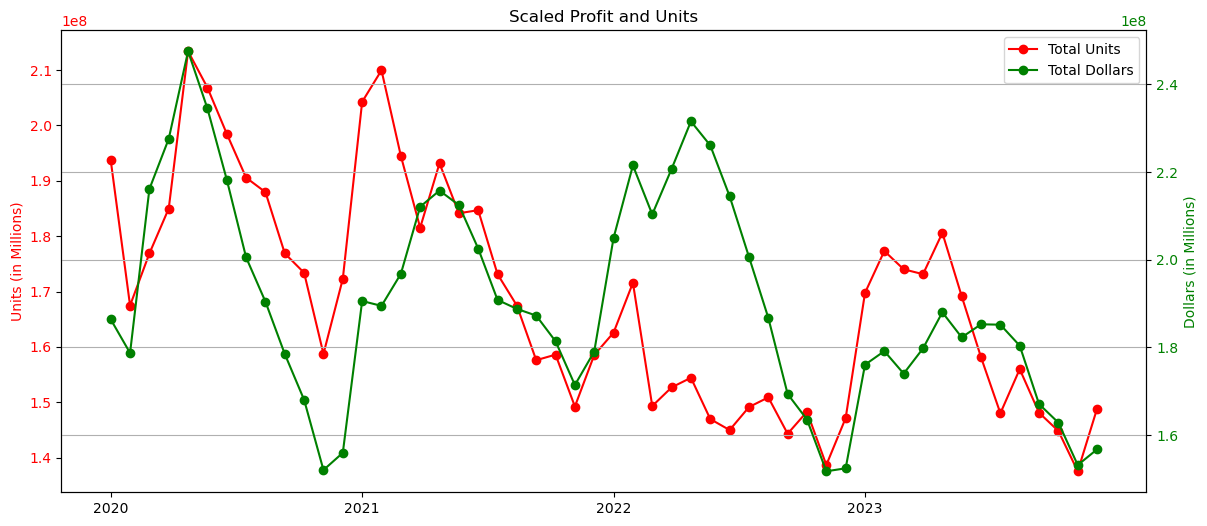

In [74]:
plt.figure(figsize=(14, 6))

# Plot line for units
ax1 = plt.gca()  
ax1.plot(merged_df['Extended Period'], merged_df['Units'], marker='o', linestyle='-', color='red', label='Total Units')
ax1.set_ylabel('Units (in Millions)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# # Plot line for dollars
ax2 = ax1.twinx()  
ax2.plot(merged_df['Extended Period'], merged_df['Dollars'], marker='o', linestyle='-', color='green', label='Total Dollars')
ax2.set_ylabel('Dollars (in Millions)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Setting x-axis ticks to show each year at the start of its first period
ticks = merged_df.groupby('Year')['Extended Period'].min().tolist()
labels = merged_df['Year'].unique()

plt.xticks(ticks, labels)  

plt.title('Scaled Profit and Units')
plt.xlabel('Year')
plt.grid(True)

# Combine legends of both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.show()